In [1]:
import pandas as pd
import re

In [2]:
bbaw_eg = pd.read_csv('Data/bbaw_egyptian.csv')
thesaurus_earlier = pd.read_csv('Data/thesaurus_earlier.csv')
thesaurus_late = pd.read_csv('Data/thesaurus_late.csv')

# BBAW

In [3]:
# https://huggingface.co/datasets/phiwi/bbaw_egyptian

In [4]:
bbaw_eg.isna().sum()

transcription        7
translation         21
hieroglyphs      65233
dtype: int64

Extract only how have hieroglyphics "we might use the unlabled again"

In [5]:
# select rows where hieroglyphs is not null
bbaw_eg_w_hieroglyphs = bbaw_eg[bbaw_eg['hieroglyphs'].notna()]

# select rows where hieroglyphs is null
bbaw_eg_wo_hieroglyphs = bbaw_eg[bbaw_eg['hieroglyphs'].isna()]

Cleaning

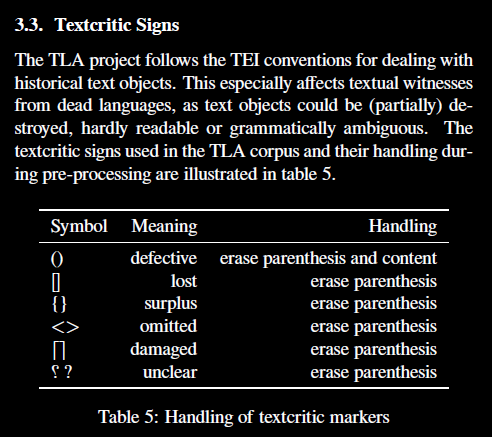

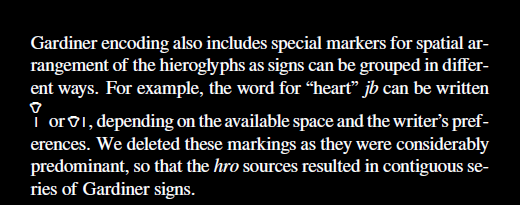

In [6]:
# show image from path in this notebook
from IPython.display import Image, display
display(Image("images/bbaw_pre.png"))
display(Image("images/bbaw_pre1.png"))

In [7]:
def clean_hieroglyphs(hiero_str):
    if not isinstance(hiero_str, str):
        return ""

    # 1) Remove parentheses and their contents: ()
    hiero_str = re.sub(r'\(.*?\)', '', hiero_str)

    # 2) Remove text-critical brackets ([], {}, ⌈⌉, ⸢⸣)
    hiero_str = re.sub(r'[\[\]\{\}⌈⌉⸢⸣]', ' ', hiero_str)

    # 3) Remove unclear marker '?'
    hiero_str = hiero_str.replace('?', '')

    # 4) Remove spatial / layout operators: -, :, *, &, /, =
    hiero_str = re.sub(r'[-*:\/=&]', ' ', hiero_str)

    # 5) Normalize spaces
    hiero_str = ' '.join(hiero_str.split())

    return hiero_str


In [8]:
bbaw_eg_w_hieroglyphs['hieroglyphs_cleaned'] = bbaw_eg_w_hieroglyphs['hieroglyphs'].apply(clean_hieroglyphs)

C:\Users\user\AppData\Local\Temp\ipykernel_35580\4069535579.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bbaw_eg_w_hieroglyphs['hieroglyphs_cleaned'] = bbaw_eg_w_hieroglyphs['hieroglyphs'].apply(clean_hieroglyphs)


In [9]:
bbaw_eg_w_hieroglyphs.to_csv('Cleaned_Data/bbaw_egyptian_w_hieroglyphs.csv', index=False)

In [10]:
bbaw_eg_wo_hieroglyphs.to_csv('Cleaned_Data/bbaw_egyptian_wo_hieroglyphs.csv', index=False)

# thesaurus earlier

In [11]:
# https://huggingface.co/datasets/thesaurus-linguae-aegyptiae/tla-Earlier_Egyptian_original-v18-premium

In [12]:
thesaurus_earlier = pd.read_csv('Data/thesaurus_earlier.csv')

In [13]:
thesaurus_earlier.head()

,hieroglyphs,transliteration,lemmatization,UPOS,glossing,translation,dateNotBefore,dateNotAfter
0,𓐩𓏌𓀜 𓂧 𓂋 𓋴,nḏ (w)di̯ r =s,90880|nḏ 51510|wdi̯ 91901|r 10090|=s,VERB VERB ADP PRON,V\tam.pass V\tam.pass PREP:stpr -3sg.f,"(es) werde zerrieben, (es) werde darauf gelegt.",-1580,-1539
1,𓂜 𓍿𓅱 𓇋𓅓 𓋴𓈖,n ṯw ꞽm =sn,78890|n 174900|ṯw 400007|m 10100|=sn,PART PRON ADP PRON,PTCL =2sg.m PREP:stpr -3pl,Du gehörst nicht zu ihnen.,-2278,-2184
2,<g>M12B</g> 𓅓 𓏐𓏒 𓏊 𓃾𓏒 𓅿 𓈖 𓄪 𓄓𓈙𓈖𓂝𓎩𓏨 𓇋𓏠𓈖𓅓𓄂𓏏 𓐙𓊤︂,ḫꜣ m tʾ ḥnq.t kꜣ(.PL) ꜣpd(.PL) n ꞽmꜣḫ ꞽm.ꞽ-rʾ-...,113110|ḫꜣ 400082|m 168810|tʾ 110300|ḥnq.t 1629...,NOUN ADP NOUN NOUN NOUN NOUN ADP NOUN NOUN PRO...,N.m PREP N.m N.f N.m:pl N.m:pl PREP N.m TITL R...,"Tausend an Brot, Bier, Rindern und Geflügel fü...",-1878,-1843
3,𓊢𓂝,ꜥḥꜥ,40110|ꜥḥꜥ,VERB,V\imp.sg,Steh auf!,-2278,-2184
4,𓊨𓁹 𓍹𓃹𓈖𓇋𓋴𓍺 𓌇 𓈖 𓎡 𓁹𓏏𓏤𓅃 𓇋𓂝𓎺 𓈖 𓎡 𓋴 𓇋𓂋 𓂋 𓎡,(w)sꞽr wnꞽs m n =k ꞽr.t-ḥr.w ꞽꜥb n =k s(ꞽ) ꞽr ...,49461|Wsꞽr 800001|Wnꞽs 67780|mꞽ 400055|n 10110...,NOUN PROPN VERB ADP PRON NOUN VERB ADP PRON PR...,TITL ROYLN V\imp.sg PREP:stpr -2sg.m N.f V\imp...,"Osiris Unas, nimm dir das Horusauge und stecke...",-2375,-2345


In [14]:
thesaurus_earlier = thesaurus_earlier[['hieroglyphs','translation']]

In [15]:
translation_thesaurus_earlier = thesaurus_earlier['translation'].tolist()
translation_bbaw_eg_w_hieroglyphs = bbaw_eg_w_hieroglyphs['translation'].tolist()

# Finding common translations between the two datasets

# remove non-string entries
translation_thesaurus_earlier = [t for t in translation_thesaurus_earlier if isinstance(t, str)]
translation_bbaw_eg_w_hieroglyphs = [t for t in translation_bbaw_eg_w_hieroglyphs if isinstance(t, str)]

# remove non-alphabetic characters
translation_thesaurus_earlier = [re.sub(r'[^a-zA-Z\s]', '', t) for t in translation_thesaurus_earlier]
translation_bbaw_eg_w_hieroglyphs = [re.sub(r'[^a-zA-Z\s]', '', t) for t in translation_bbaw_eg_w_hieroglyphs]

# strip leading and trailing whitespace
translation_thesaurus_earlier = [t.strip() for t in translation_thesaurus_earlier]
translation_bbaw_eg_w_hieroglyphs = [t.strip() for t in translation_bbaw_eg_w_hieroglyphs]

# remove empty strings
translation_thesaurus_earlier = [t for t in translation_thesaurus_earlier if t]
translation_bbaw_eg_w_hieroglyphs = [t for t in translation_bbaw_eg_w_hieroglyphs if t]

# normalize to lowercase
translation_thesaurus_earlier = [t.lower() for t in translation_thesaurus_earlier]
translation_bbaw_eg_w_hieroglyphs = [t.lower() for t in translation_bbaw_eg_w_hieroglyphs]

# find common translations
common_translations = set(translation_thesaurus_earlier).intersection(set(translation_bbaw_eg_w_hieroglyphs))
len(common_translations)

4797

# thesaurus late

In [16]:
# https://huggingface.co/datasets/thesaurus-linguae-aegyptiae/tla-late_egyptian-v19-premium

In [17]:
thesaurus_late = pd.read_csv('Data/thesaurus_late.csv')

In [18]:
thesaurus_late.head()

,hieroglyphs,transliteration,lemmatization,UPOS,glossing,translation,dateNotBefore,dateNotAfter
0,𓇋𓅱 𓅯𓄿 𓇯𓅺𓏏𓏭𓅂𓀜𓀀𓏥𓈖𓉻𓉐𓉐𓅆𓋹𓍑𓋴 𓁷<g>Ff101</g>𓏤 𓈝𓅓𓏏𓂻 𓂋 𓌸...,ꞽw pꜣ ḥr.ꞽ-rḫt.ꞽ.w.PL-n-pr-ꜥꜣ-ꜥnḫ-wḏꜣ-snb ḥr š...,851513|ꞽw 58770|pꜣ 854607|ḥr.ꞽ-rḫt.ꞽw-n-pr-ꜥꜣ-...,PART PRON NOUN ADP VERB ADP NOUN PART NOUN PRO...,PTCL art:m.sg N.m PREP V\inf PREP N.f PTCL N:s...,Dann ging der Leiter der Wäscher Pharaos - LHG...,-1202,-1198
1,𓇋𓏲 𓆑 𓁷𓏤 𓂞𓏏 𓈖 𓆑 𓉐𓏤 𓎛𓈖𓂝 𓄿𓎛𓏏𓈇𓏥 𓅓𓏇𓏏𓏏𓏛 𓇋𓄿𓏲𓏏𓊑𓄛𓏥 𓐍𓏏𓏛𓏥...,ꞽw ⸗f ḥr ḏi̯.t n ⸗f pr ḥnꜥ ꜣḥ.t.PL m-mꞽ.tt ꞽꜣ....,851513|ꞽw 10050|⸗f 107529|ḥr 96700|rḏi̯ 400055...,PART PRON ADP VERB ADP PRON NOUN ADP NOUN ADV ...,AUX:stpr -3sg.m PREP V\inf PREP:stpr -3sg.m N....,"Dann gab er ihm ein Haus und Felder, gleicherm...",-1279,-1213
2,𓅯𓄿𓇋𓇋 𓀀 𓂀 𓅯𓄿𓇋𓇋 𓋴𓏏 𓅧𓈎𓏲𓂻 𓈖𓃀𓏲𓈖𓏥𓂋𓏤𓈐𓂻,pꜣy ⸗ꞽ wḏꜣ pꜣy ⸗st ꜥqw n-bw~n~rʾ,550021|pꜣy⸗ 10030|⸗ꞽ 52100|wḏꜣ 550021|pꜣy⸗ 100...,PRON PRON NOUN PRON PRON VERB ADV,art.poss:m.sg -1sg N.m art.poss:m.sg -3sg.f V\...,Ihr Eintreten von außen (sorgt für) mein Wohlb...,-1149,-1077
3,𓃹𓈖𓇋𓈖 𓊃 𓁷<g>Ff100</g>𓏤 𓈝𓅓𓏏<g>Ff100</g>𓂻 𓂋 𓆓𓂧 𓈖 ...,wn.ꞽn ⸗s ḥr šmi̯.t r ḏd n pꜣ-rꜥ-ḥr.w-ꜣḫ.tꞽ.DU,650007|wn.ꞽn 10090|⸗s 107529|ḥr 852485|šmi̯ 91...,PART PRON ADP VERB ADP VERB ADP PROPN,AUX:stpr -3sg.f PREP V\inf PREP V\inf PREP DIVN,"Da ging sie, um Re-Harachte zu sagen:",-1149,-1077
4,𓂜𓈖 𓇋𓏲 𓀀 𓂋 𓂞𓏏 𓅷𓄿𓇋𓇋𓂷𓂡 𓈖 𓀀 𓅂𓄿𓇋𓇋 𓀀 𓎟,nn ꞽw ⸗ꞽ r ḏi̯.t ṯꜣy n ⸗ꞽ pꜣy ⸗ꞽ nb,84550|nn 851514|ꞽw 10030|⸗ꞽ 91907|r 550028|rḏi...,PART PART PRON ADP VERB VERB ADP PRON PRON PRO...,PTCL AUX:stpr -1sg PREP V\inf V\tam.act PREP:s...,"Ich werde keinen Anlass geben, dass mein Herr ...",-1202,-1198


In [19]:
thesaurus_late = thesaurus_late[['hieroglyphs','translation']]

In [20]:
# find common translations between thesaurus_late and bbaw_eg_w_hieroglyphs

translation_thesaurus_late = thesaurus_late['translation'].tolist()
translation_bbaw_eg_w_hieroglyphs = bbaw_eg_w_hieroglyphs['translation'].tolist()

# remove non-string entries
translation_thesaurus_late = [t for t in translation_thesaurus_late if isinstance(t, str)]
translation_bbaw_eg_w_hieroglyphs = [t for t in translation_bbaw_eg_w_hieroglyphs if isinstance(t, str)]

# remove non-alphabetic characters
translation_thesaurus_late = [re.sub(r'[^a-zA-Z\s]', '', t) for t in translation_thesaurus_late]
translation_bbaw_eg_w_hieroglyphs = [re.sub(r'[^a-zA-Z\s]', '', t) for t in translation_bbaw_eg_w_hieroglyphs]

# strip leading and trailing whitespace
translation_thesaurus_late = [t.strip() for t in translation_thesaurus_late]
translation_bbaw_eg_w_hieroglyphs = [t.strip() for t in translation_bbaw_eg_w_hieroglyphs]

# remove empty strings
translation_thesaurus_late = [t for t in translation_thesaurus_late if t]
translation_bbaw_eg_w_hieroglyphs = [t for t in translation_bbaw_eg_w_hieroglyphs if t]

# normalize to lowercase
translation_thesaurus_late = [t.lower() for t in translation_thesaurus_late]
translation_bbaw_eg_w_hieroglyphs = [t.lower() for t in translation_bbaw_eg_w_hieroglyphs]

# find common translations
common_translations_late = set(translation_thesaurus_late).intersection(set(translation_bbaw_eg_w_hieroglyphs))
len(common_translations_late)

822